In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import warnings
import time
warnings.filterwarnings("ignore")

from sklearn.preprocessing import PowerTransformer, QuantileTransformer

In [2]:
df = pd.read_csv("Diagnostic_Data.csv")
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

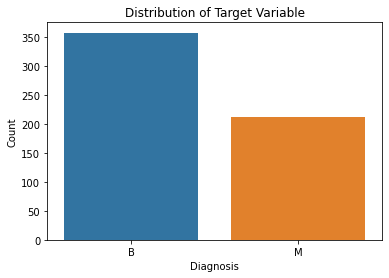

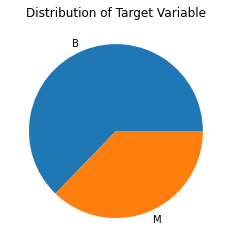

In [23]:
sns.barplot(y=df['diagnosis'].value_counts().values, x = [0, 1])
plt.xticks([0, 1], ['B', 'M'])
plt.title('Distribution of Target Variable')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

plt.pie(df['diagnosis'].value_counts().values, labels=['B', 'M'], radius=1)
plt.title('Distribution of Target Variable')
plt.show()

In [24]:
df['diagnosis'].replace({'M':1, 'B':0}, inplace=True)

In [25]:
df.drop(columns=['Unnamed: 32', 'id'], inplace = True)

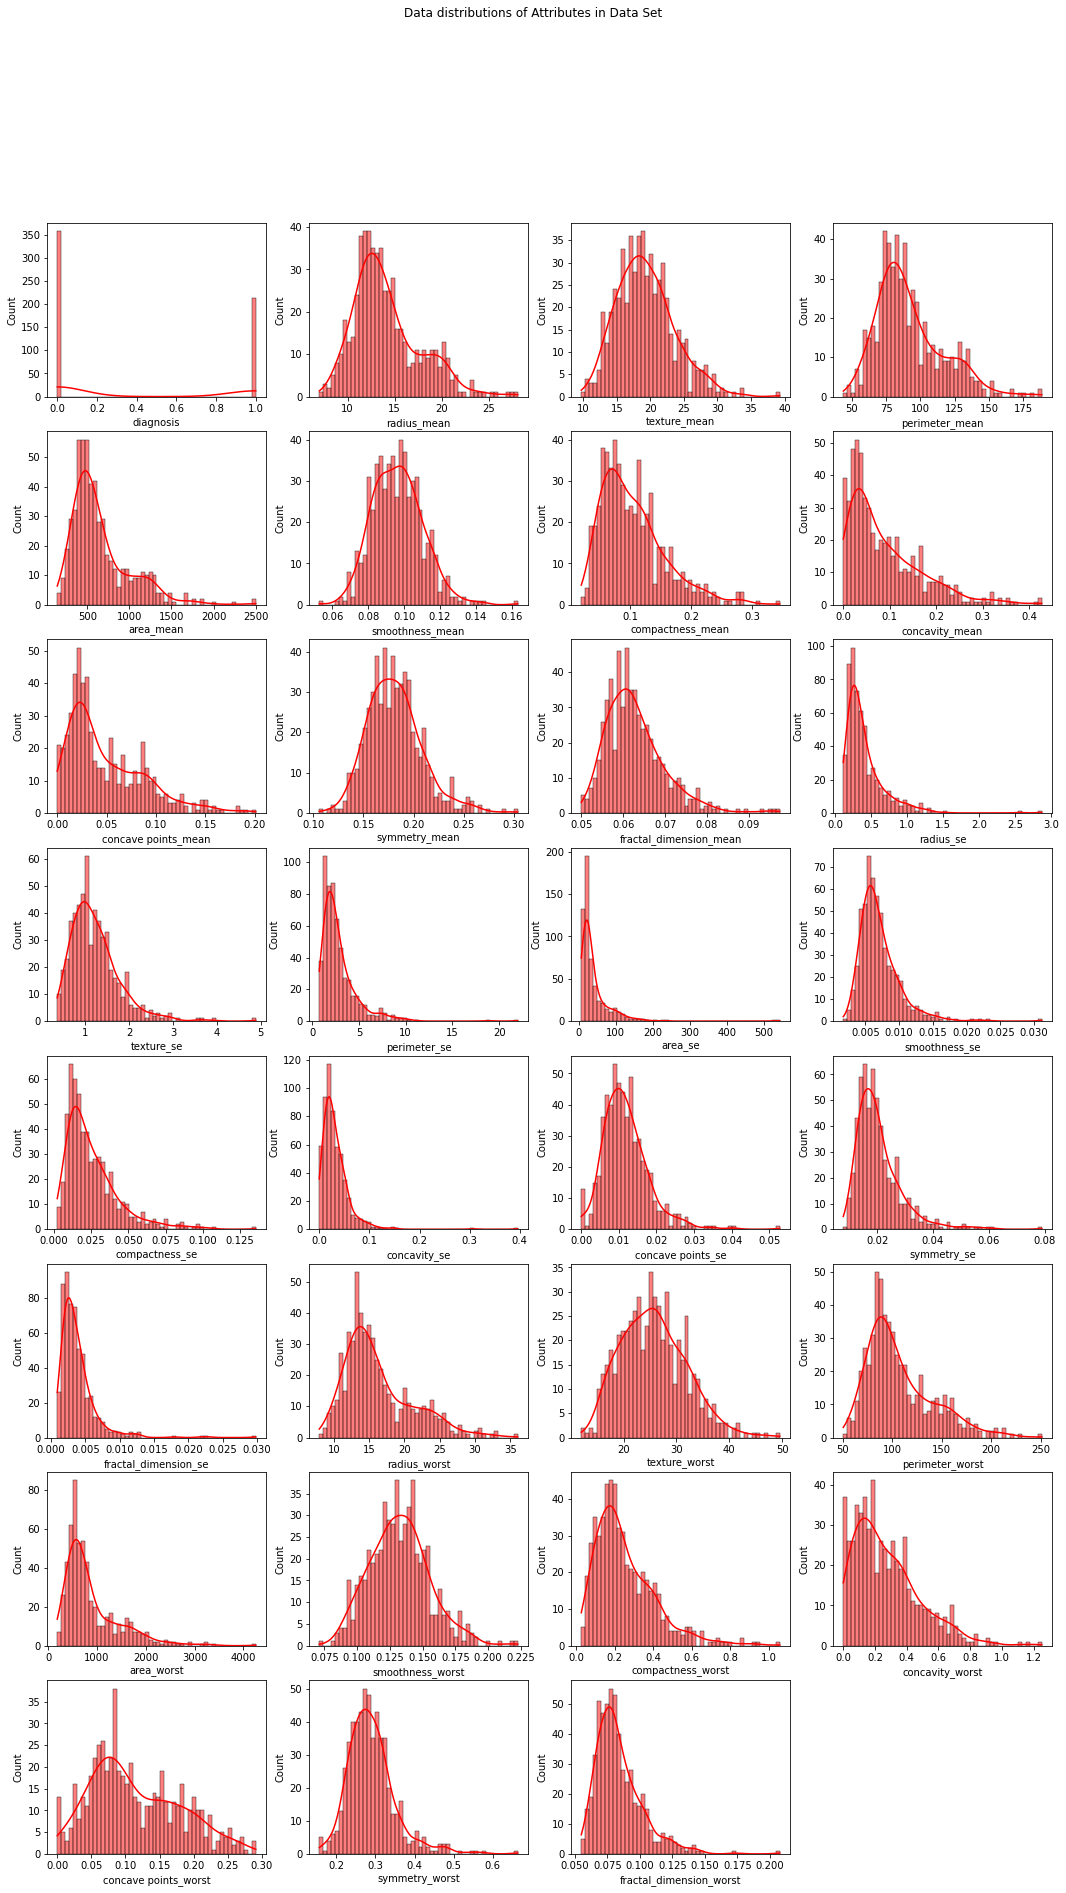

In [33]:
columns = list(df.columns)

def data_distribution(columns, bins = 50):
    fig = plt.figure(figsize=(18, 30))
    plt.suptitle("Data distributions of Attributes in Data Set")
    counter = 1
    for i in columns:
        plt.subplot(8,4, counter)
        sns.histplot(df[i], bins = bins, kde = True, color ='red')
        counter += 1

data_distribution(columns[0:31], bins = 50)        

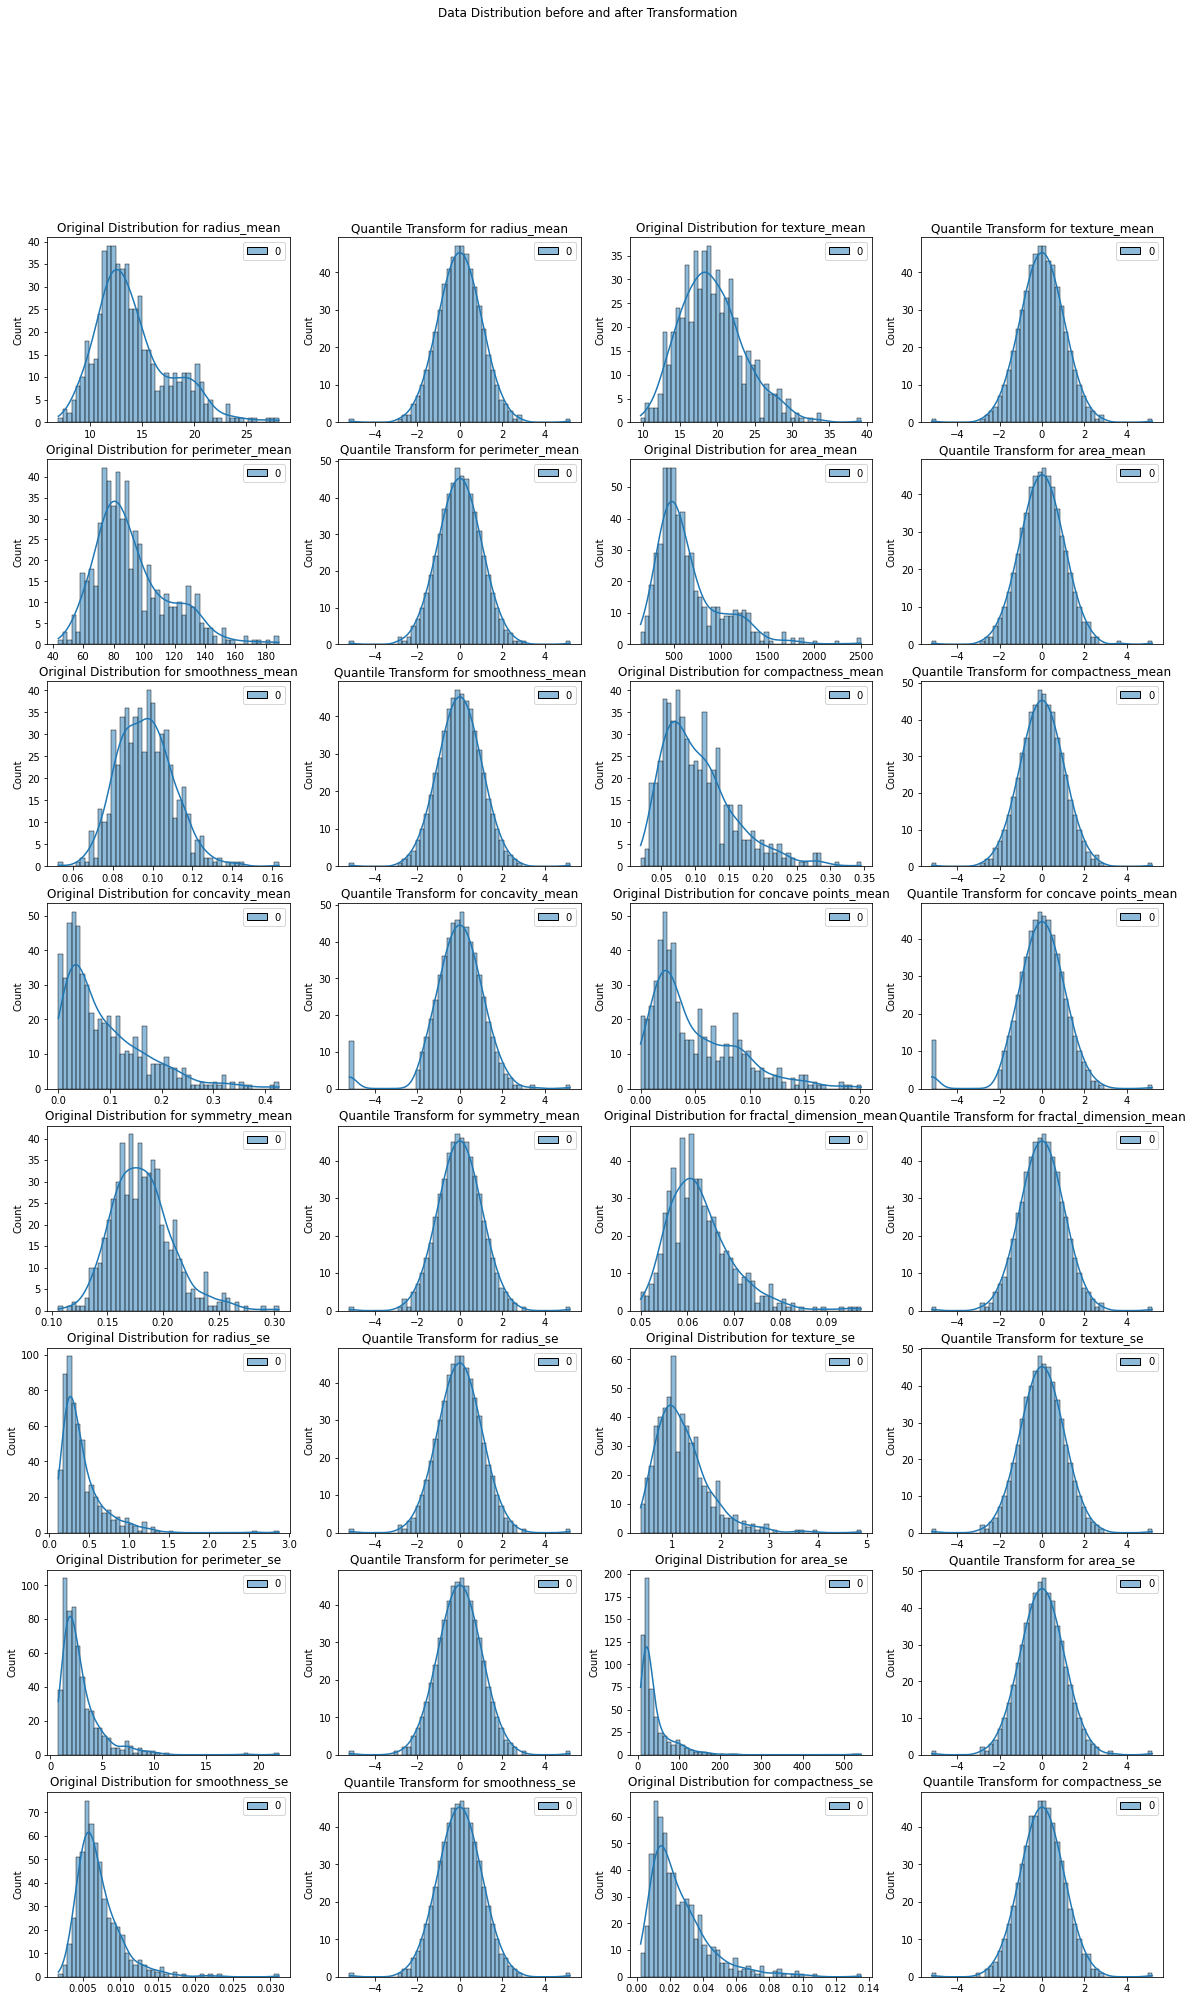

In [96]:
def transformer(columns):
    qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
    fig = plt.figure(figsize=(20,32))
    plt.suptitle("Data Distribution before and after Transformation")
    j = 1
    for i in columns:
        array = np.array(df[i]).reshape(-1, 1)
        x = qt.fit_transform(array)
        plt.subplot(8,4,j)
        sns.histplot(array, bins = 50, kde = True)
        plt.title(f"Original Distribution for {i}")
        plt.subplot(8,4,j+1)
        sns.histplot(x, bins = 50, kde = True)
        plt.title(f"Quantile Transform for {i}")
        j += 2
transformer(columns[1:17])

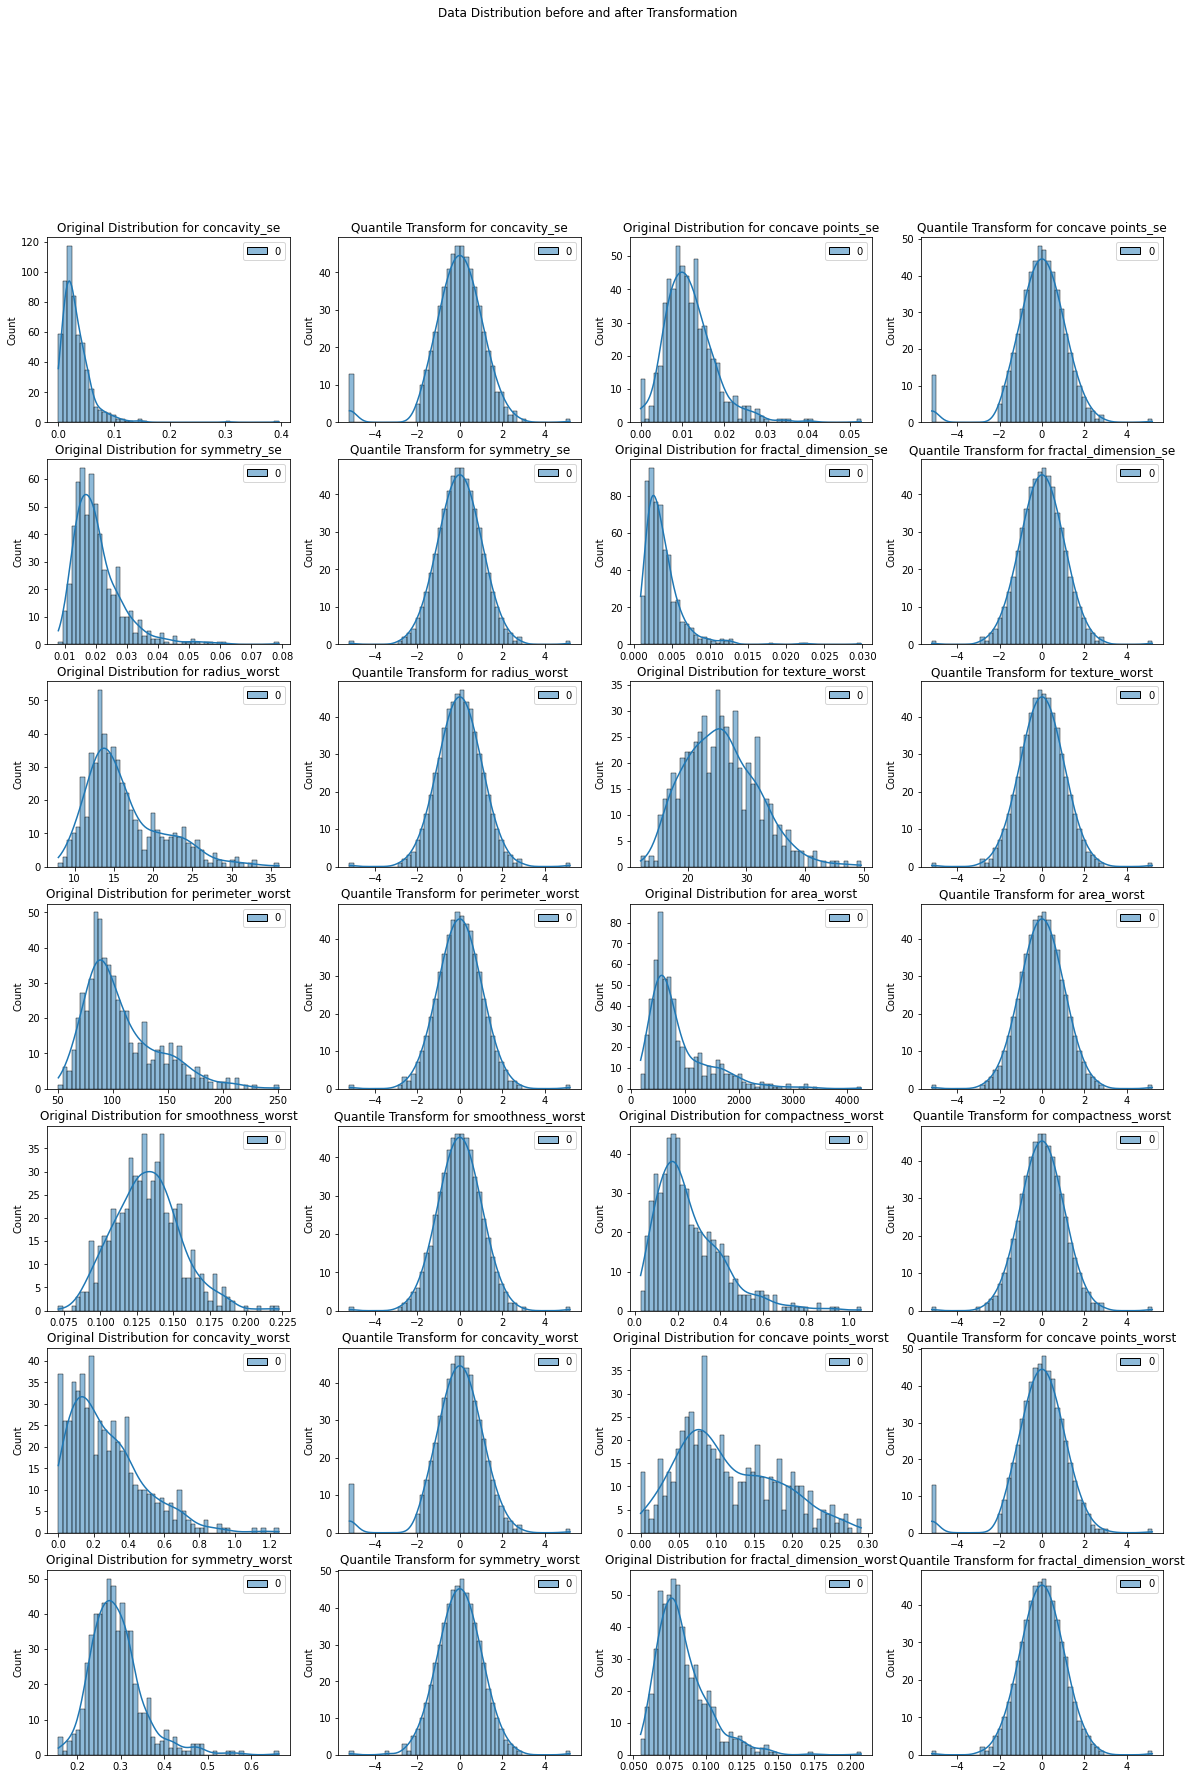

In [97]:
transformer(columns[17:])

In [13]:
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')

for i in columns[1:]:
    df[i] = qt.fit_transform(np.array(df[i]).reshape(-1,1))
    print(f"{i} transformation Successful!")

radius_mean transformation Successful!
texture_mean transformation Successful!
perimeter_mean transformation Successful!
area_mean transformation Successful!
smoothness_mean transformation Successful!
compactness_mean transformation Successful!
concavity_mean transformation Successful!
concave points_mean transformation Successful!
symmetry_mean transformation Successful!
fractal_dimension_mean transformation Successful!
radius_se transformation Successful!
texture_se transformation Successful!
perimeter_se transformation Successful!
area_se transformation Successful!
smoothness_se transformation Successful!
compactness_se transformation Successful!
concavity_se transformation Successful!
concave points_se transformation Successful!
symmetry_se transformation Successful!
fractal_dimension_se transformation Successful!
radius_worst transformation Successful!
texture_worst transformation Successful!
perimeter_worst transformation Successful!
area_worst transformation Successful!
smoothne

In [34]:
# Creating a list of columns with only the columns that represent the mean.
mean_columns = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
             'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
             'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Creating a list of columns with only the columns that represent the worst values.
worst_columns = ['diagnosis', 'radius_worst', 'texture_worst',
              'perimeter_worst', 'area_worst', 'smoothness_worst',
              'compactness_worst', 'concavity_worst', 'concave points_worst',
              'symmetry_worst', 'fractal_dimension_worst']

se_columns = ['diagnosis', 'radius_se', 'texture_se',
              'perimeter_se', 'area_se', 'smoothness_se',
              'compactness_se', 'concavity_se', 'concave points_se',
              'symmetry_se', 'fractal_dimension_se']

Text(0.5, 1.0, 'Correlation between SE Values')

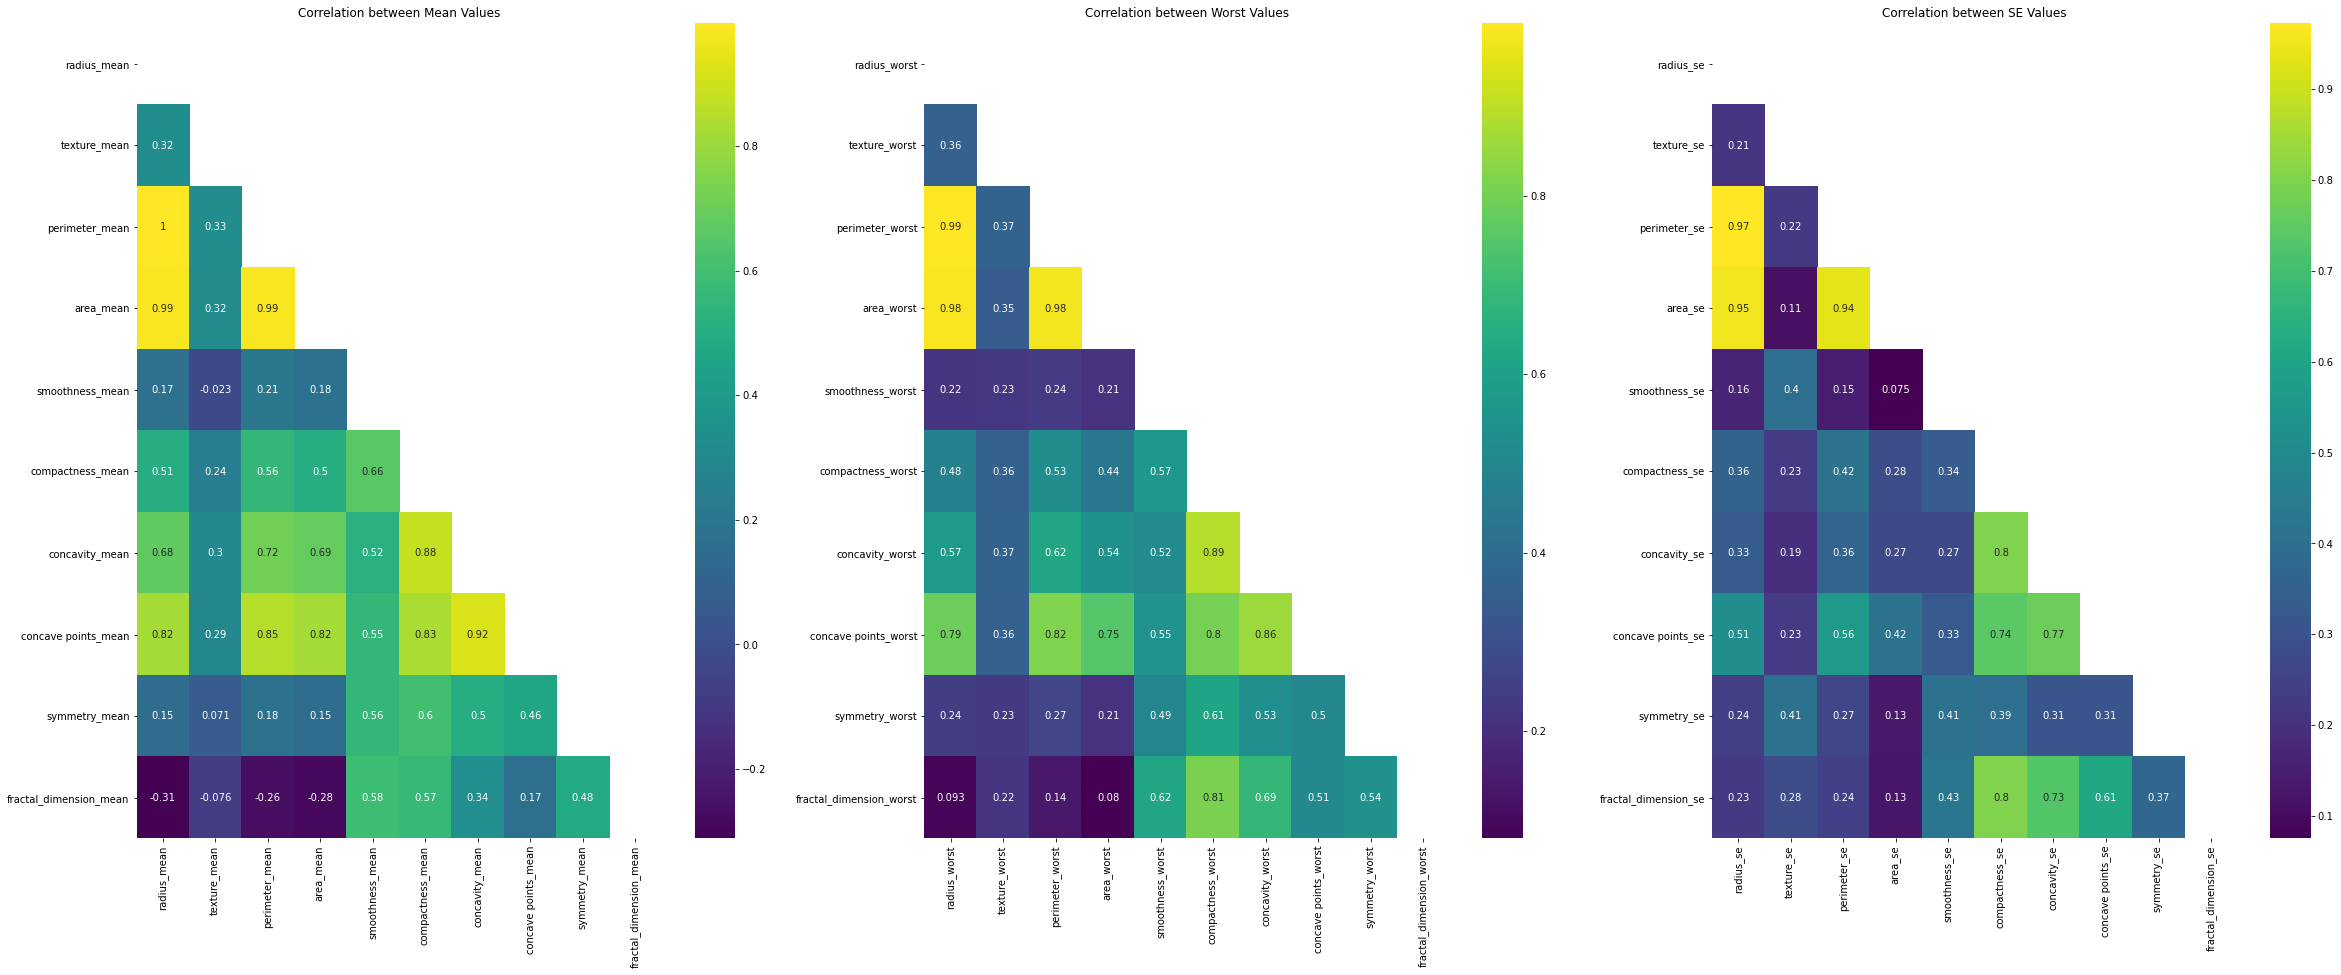

In [52]:
df_means = df.drop(columns = worst_columns+se_columns)
figure = plt.figure(figsize=(40,15))
plt.subplot(1,3,1)
matrix = np.triu(df_means.corr())
sns.heatmap(df_means.corr(), annot = True, mask=matrix, cmap='viridis')
plt.title('Correlation between Mean Values')

df_worst = df.drop(columns = mean_columns+se_columns)
plt.subplot(1,3,2)
matrix = np.triu(df_worst.corr())
sns.heatmap(df_worst.corr(), annot = True, mask=matrix, cmap='viridis')
plt.title('Correlation between Worst Values')

df_se = df.drop(columns = worst_columns+mean_columns)
plt.subplot(1,3,3)
matrix = np.triu(df_se.corr())
sns.heatmap(df_se.corr(), annot = True, mask=matrix, cmap='viridis')
plt.title('Correlation between SE Values')

<AxesSubplot:>

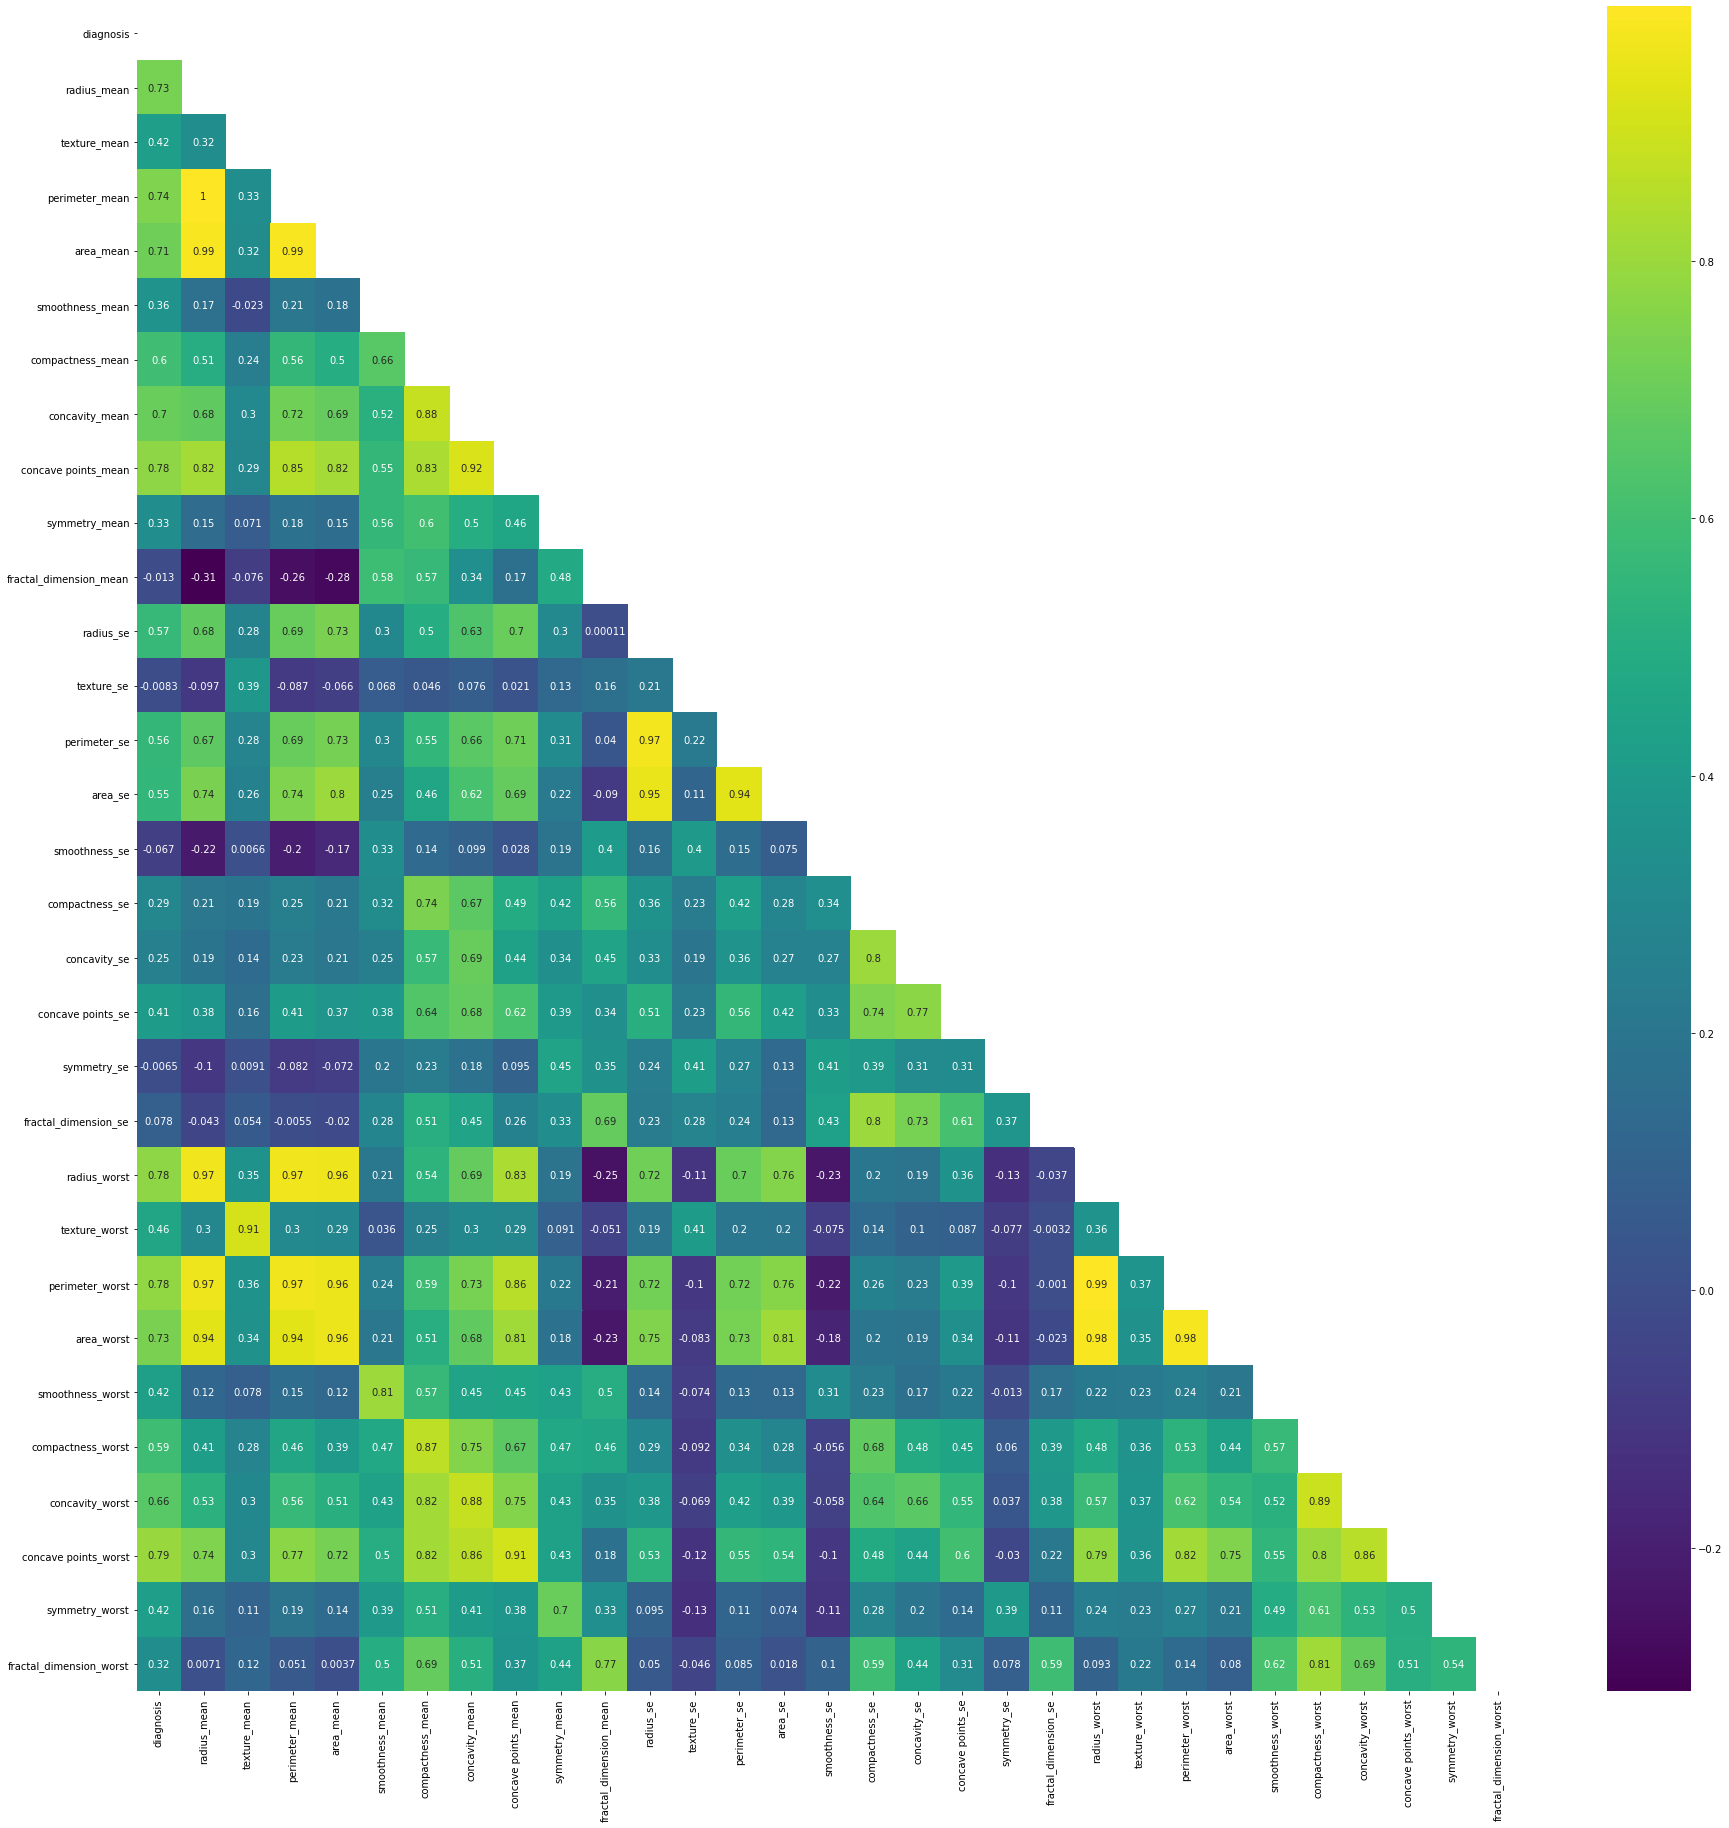

In [41]:
figure = plt.figure(figsize=(31,31))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, mask=matrix, cmap='viridis')

In [80]:
print('-------------------------------------------------------------------------------------')
print(f'|Variable 1 '.ljust(30), '|', f'Variable 2 '.ljust(30), '|', "Correlation Value".ljust(18), '|')
print('-------------------------------------------------------------------------------------')
corr = df.corr()
pairs = []
for i in list(corr.columns)[:30]:
    for j in list(corr.columns)[:30]:
        if abs(corr.loc[i,j])>0.8 and corr.loc[i,j] != 1:
            pairs.append([i, j])
            if [i, j] not in pairs or [j, i] not in pairs:
                print(f'|{i} '.ljust(30), '|',  f'{j} '.ljust(30), '|', f'{corr.loc[i,j]}'.ljust(18), "|")
print('-------------------------------------------------------------------------------------')

-------------------------------------------------------------------------------------
|Variable 1                    | Variable 2                     | Correlation Value  |
-------------------------------------------------------------------------------------
|radius_mean                   | perimeter_mean                 | 0.9978552814938109 |
|radius_mean                   | area_mean                      | 0.9873571700566127 |
|radius_mean                   | concave points_mean            | 0.8225285223871786 |
|radius_mean                   | radius_worst                   | 0.9695389726112055 |
|radius_mean                   | perimeter_worst                | 0.9651365139559871 |
|radius_mean                   | area_worst                     | 0.9410824595860461 |
|texture_mean                  | texture_worst                  | 0.912044588840421  |
|perimeter_mean                | area_mean                      | 0.9865068039913907 |
|perimeter_mean                | concave poin

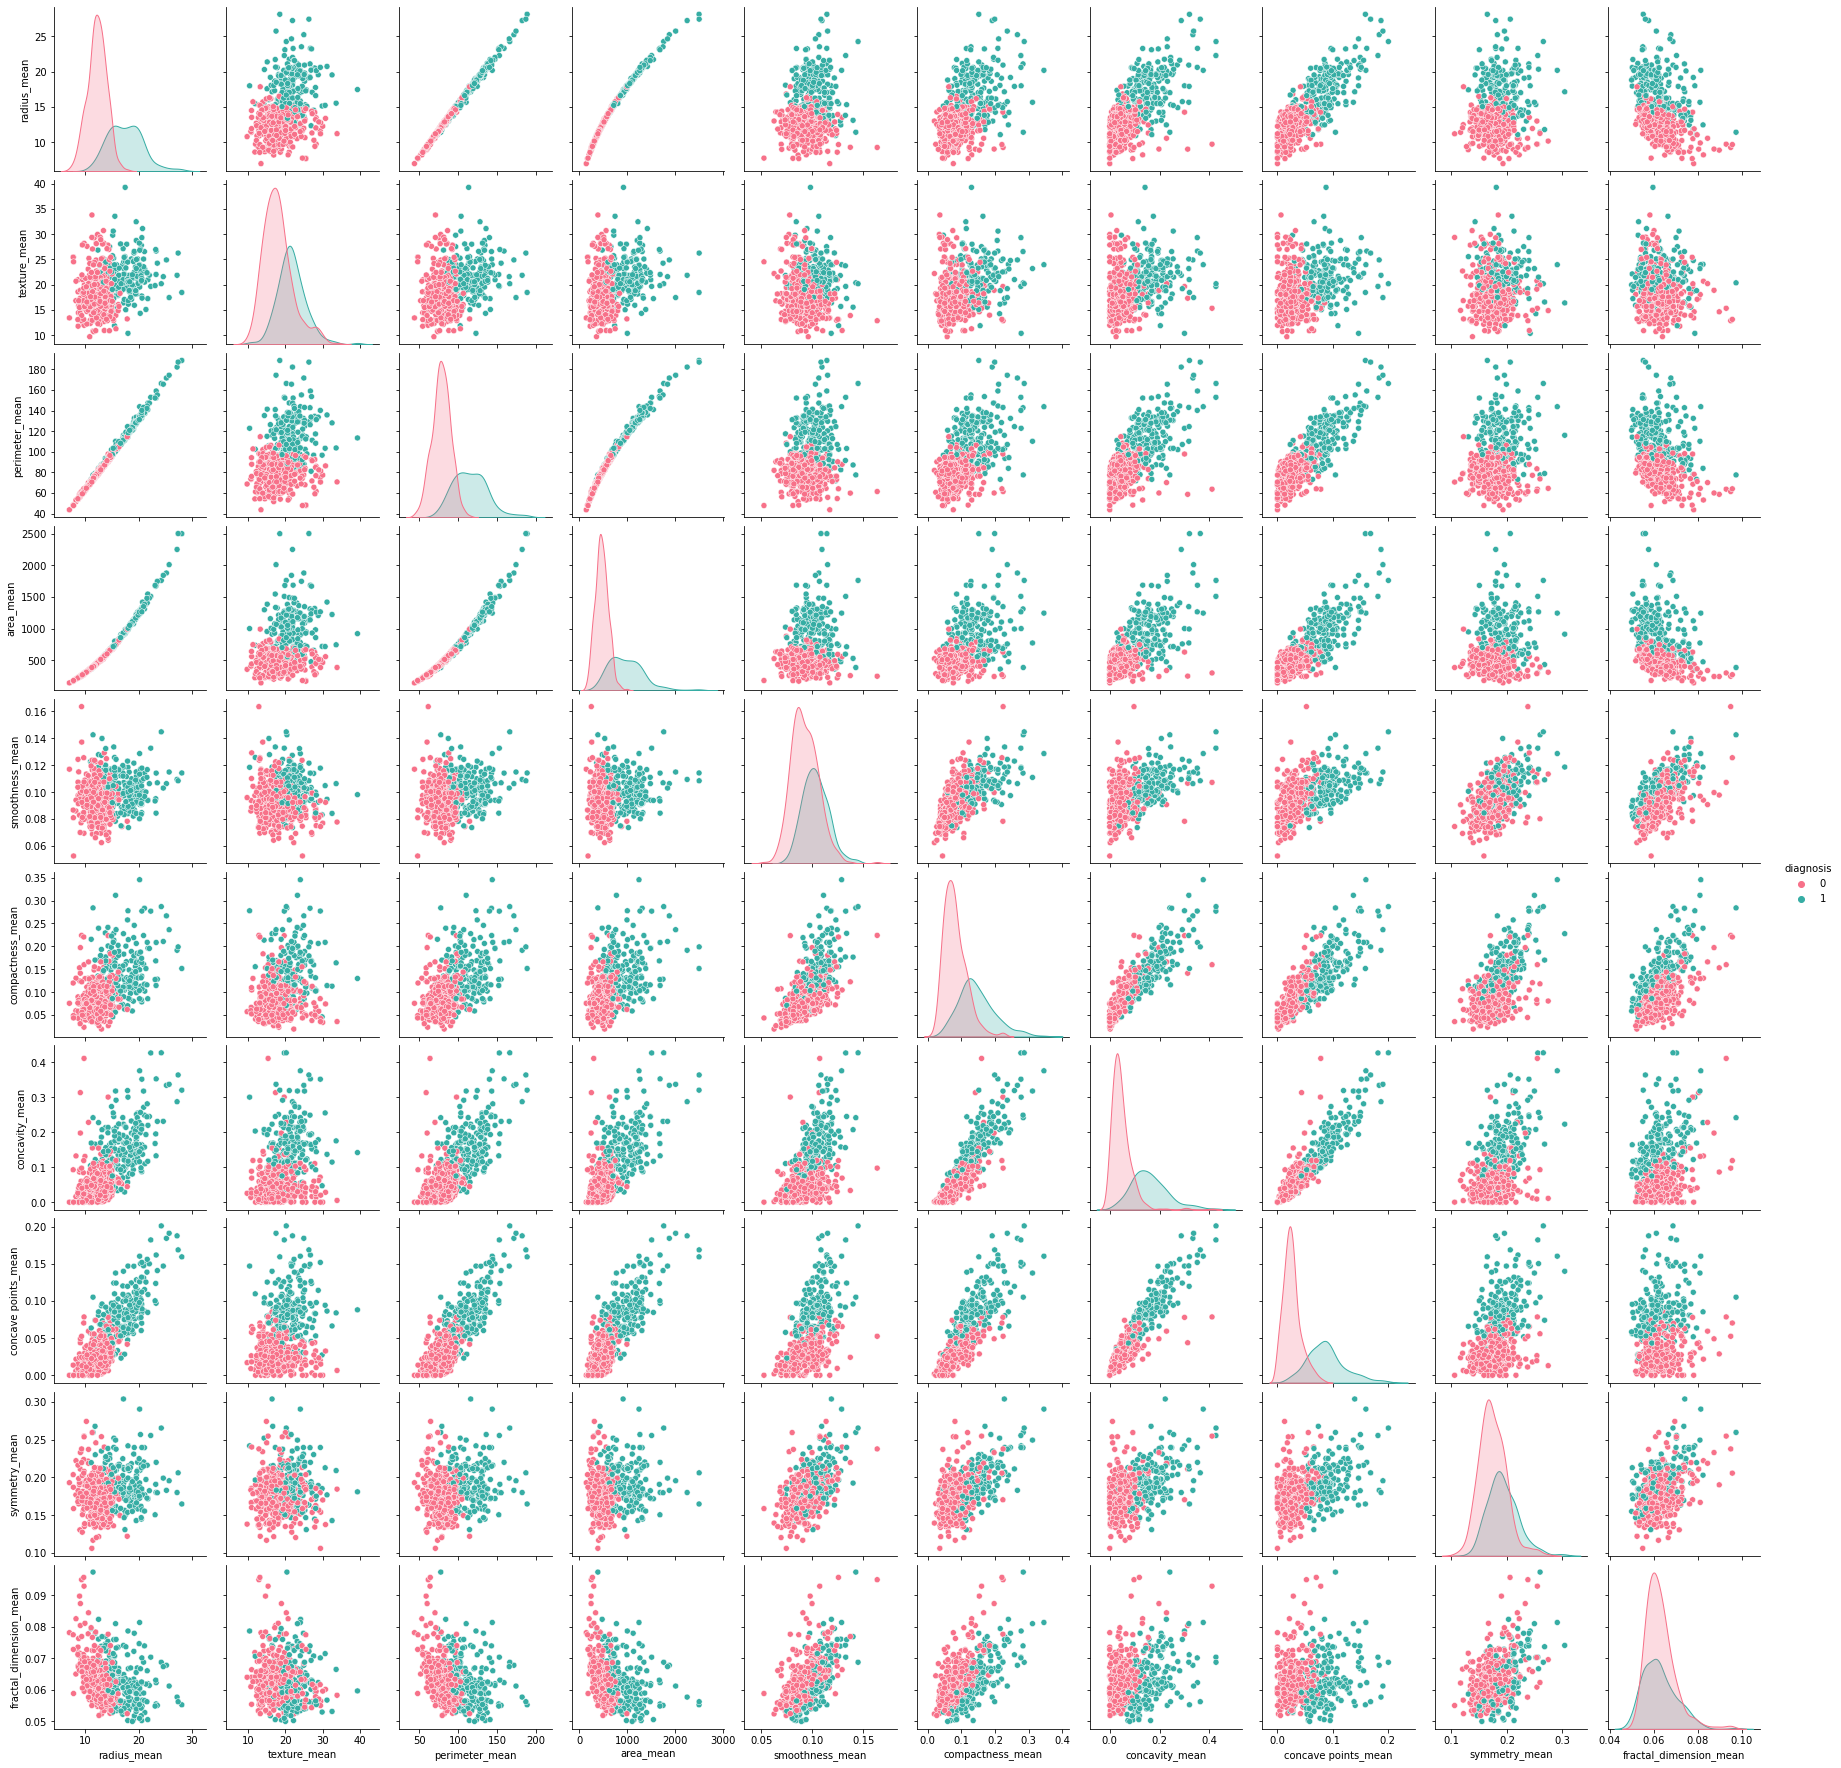

In [35]:
sns.pairplot(df[mean_columns], hue="diagnosis", palette='husl')

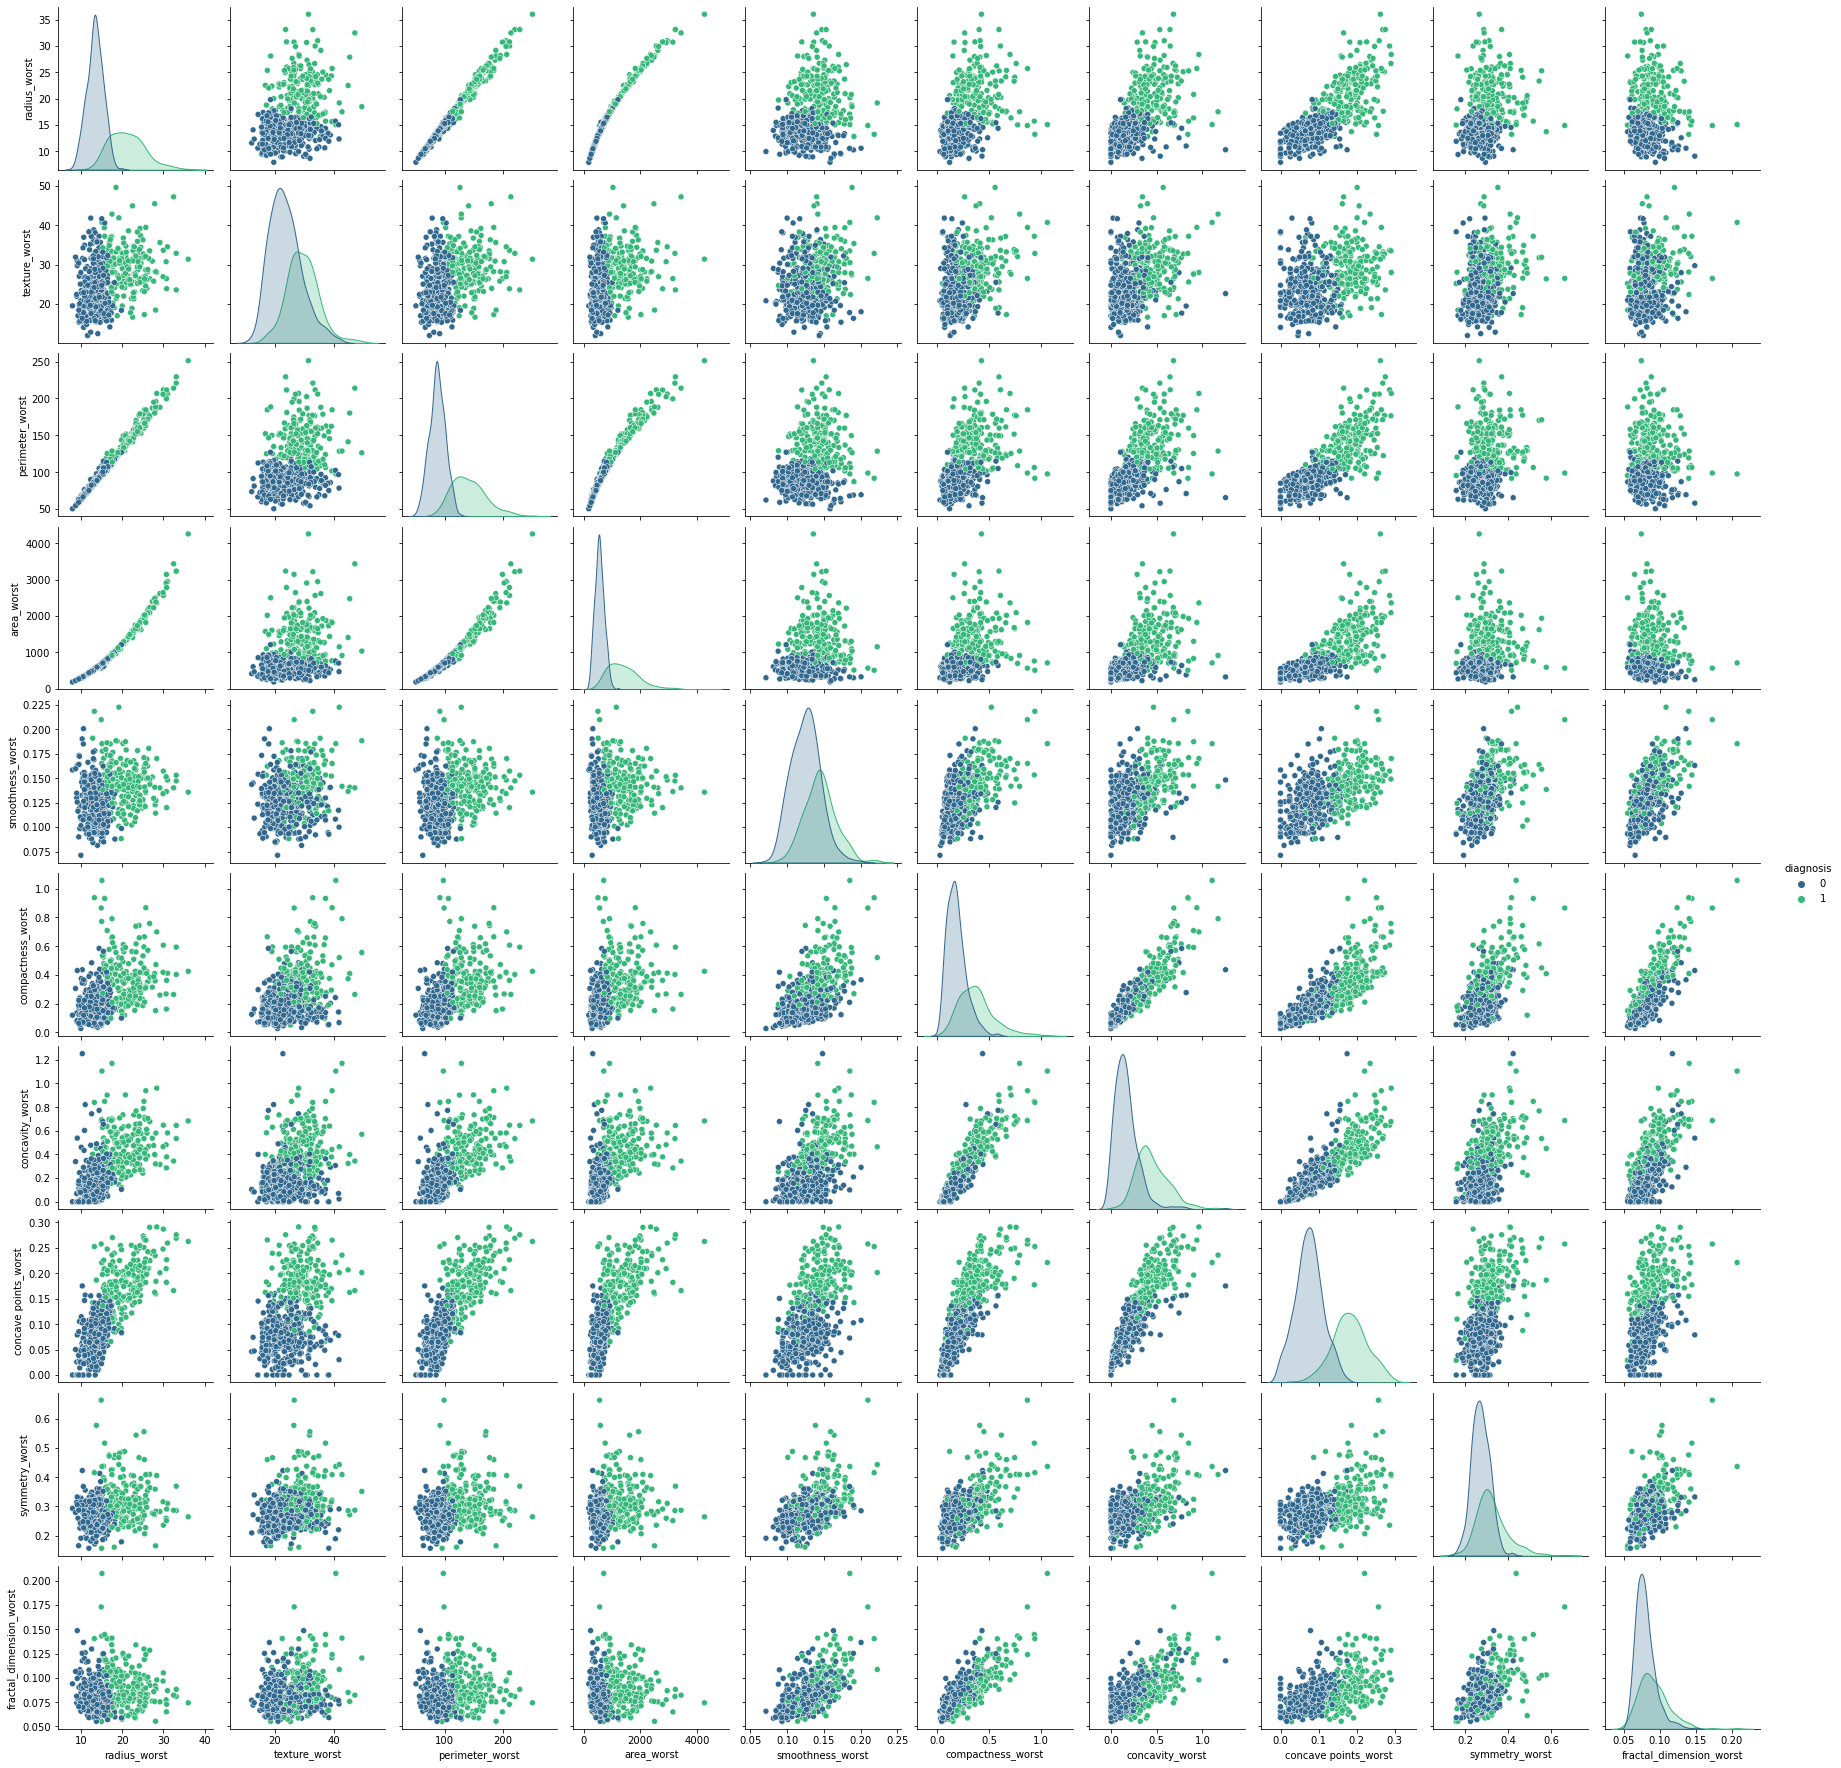

In [36]:
sns.pairplot(df[worst_columns], hue="diagnosis", palette='viridis')


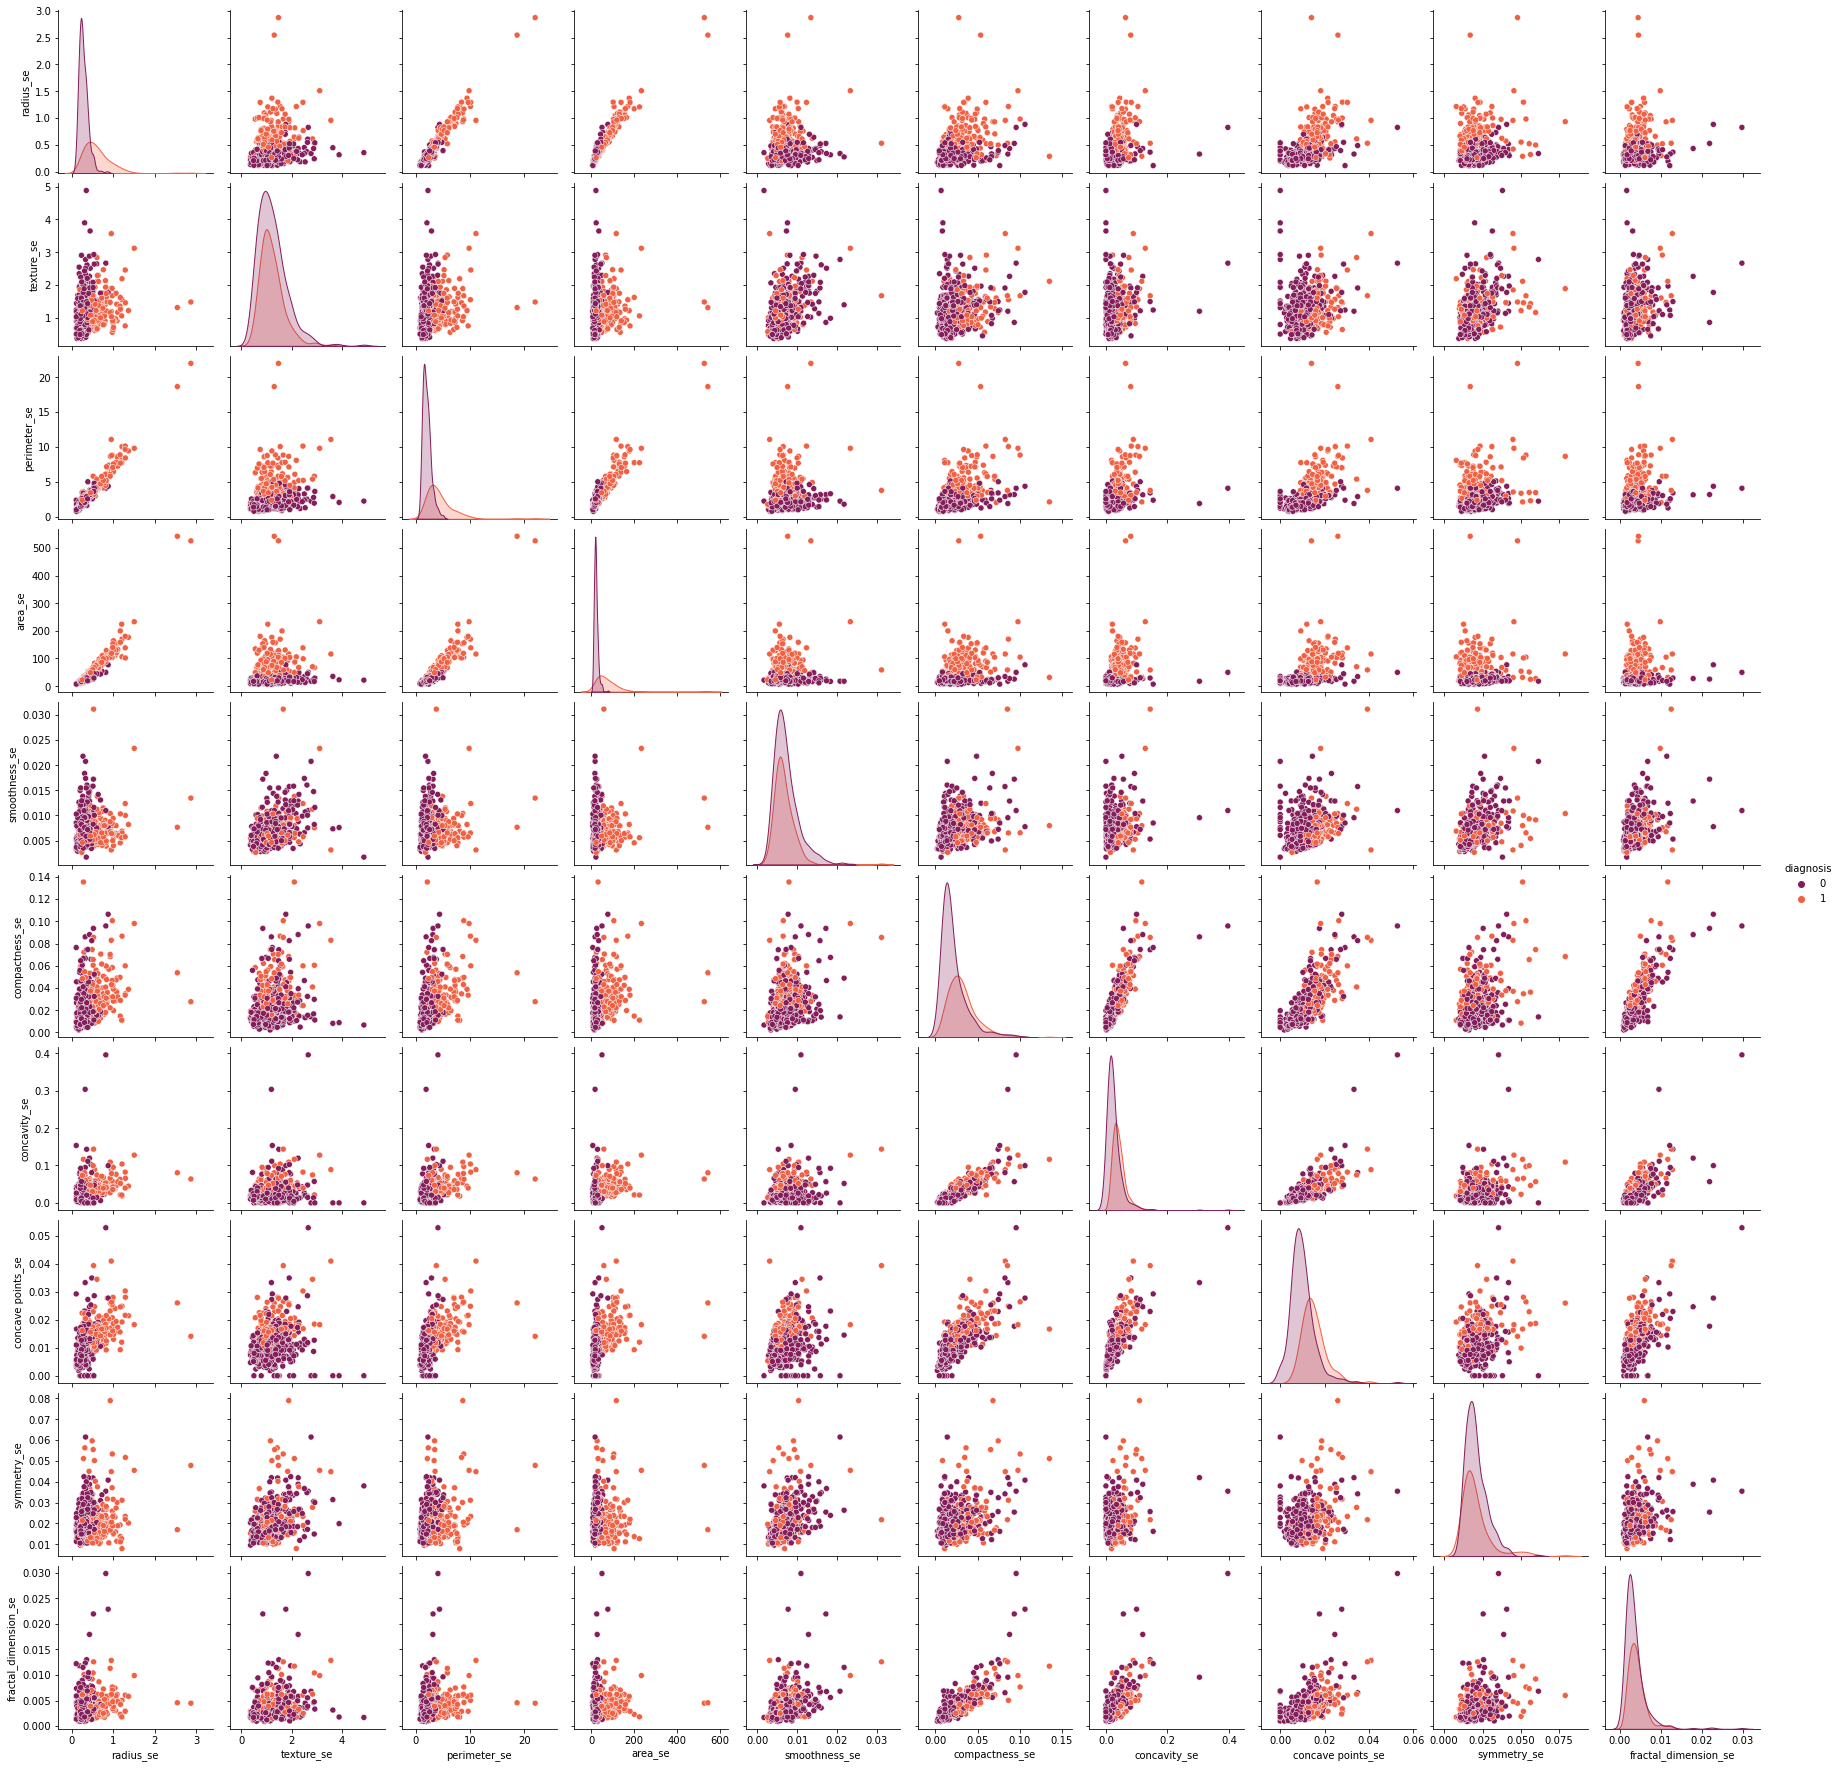

In [39]:
sns.pairplot(df[se_columns], hue="diagnosis", palette='rocket')